In [3]:
## supress warings
import warnings
warnings.filterwarnings('ignore')

In [4]:
## import numpy and panda library
import numpy as np
import pandas as pd


In [6]:
##loading csv data
bike_share=pd.read_csv('/Users/shekher.r/upgrade/python/Juune-ML53/ML/multiple_regression/BikeSharing_assignment/day.csv')

In [7]:
## showing top 5 records
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_share.shape

(730, 16)

In [9]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike_share.info()
## no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
## convert 'season'  in string categorical values

def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

bike_share[['season']]=bike_share[['season']].apply(season_map)


In [12]:
## counting no of records based on seasons
bike_share['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
## convert 'weathersit' in string categorical values
def weathersit_map(x):
    return x.map({1:'clear',2:'mistCloud',3:'lightRain',4:'heavyRain'})
bike_share['weathersit']=bike_share[['weathersit']].apply(weathersit_map)

In [14]:
## counting no of records based on weathersit
bike_share['weathersit'].value_counts()

clear        463
mistCloud    246
lightRain     21
Name: weathersit, dtype: int64

In [15]:
## removing repeated and unwanted column
#instant = we can remove index
#dteday=already we have yr and month so we can remove
#casual & registered =we have total count we can remove casual and & registered one to avoid collinearity
bike_share_new=bike_share[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [16]:
# Convert season,weathersit,mnth,weekday to 'category' data type

bike_share_new['season']=bike_share_new['season'].astype('category')
bike_share_new['weathersit']=bike_share_new['weathersit'].astype('category')
bike_share_new['mnth']=bike_share_new['mnth'].astype('category')
bike_share_new['weekday']=bike_share_new['weekday'].astype('category')


In [17]:
bike_share_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
bike_share_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
## visualising the data
import matplotlib.pyplot as plt
import seaborn as sns


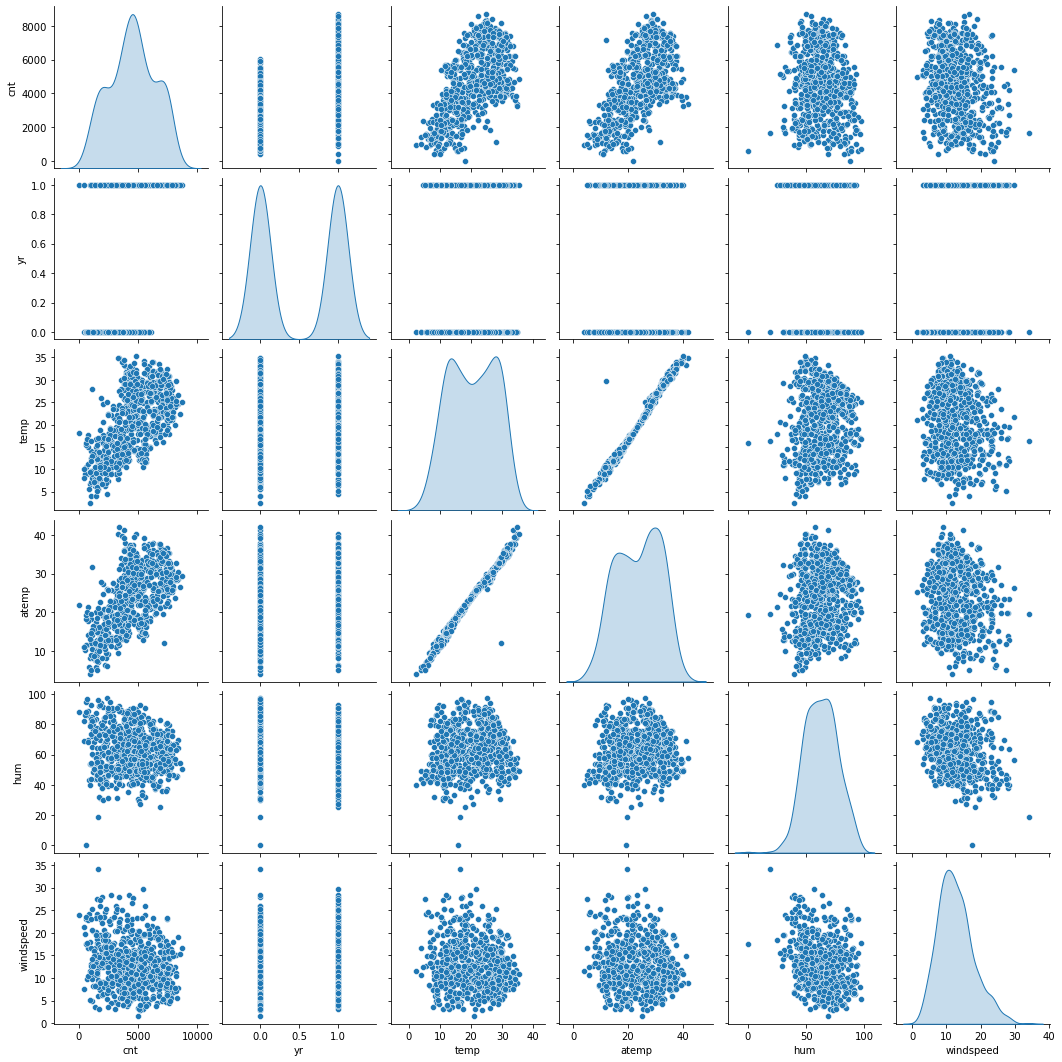

In [114]:
## visualising numeric values
sns.pairplot(bike_share_new[['cnt','yr','temp','atemp','hum','windspeed']],diag_kind='kde')
plt.show()

In [ ]:
## from above pair plot its clear there is linear relationship between cnt,temp and atemp

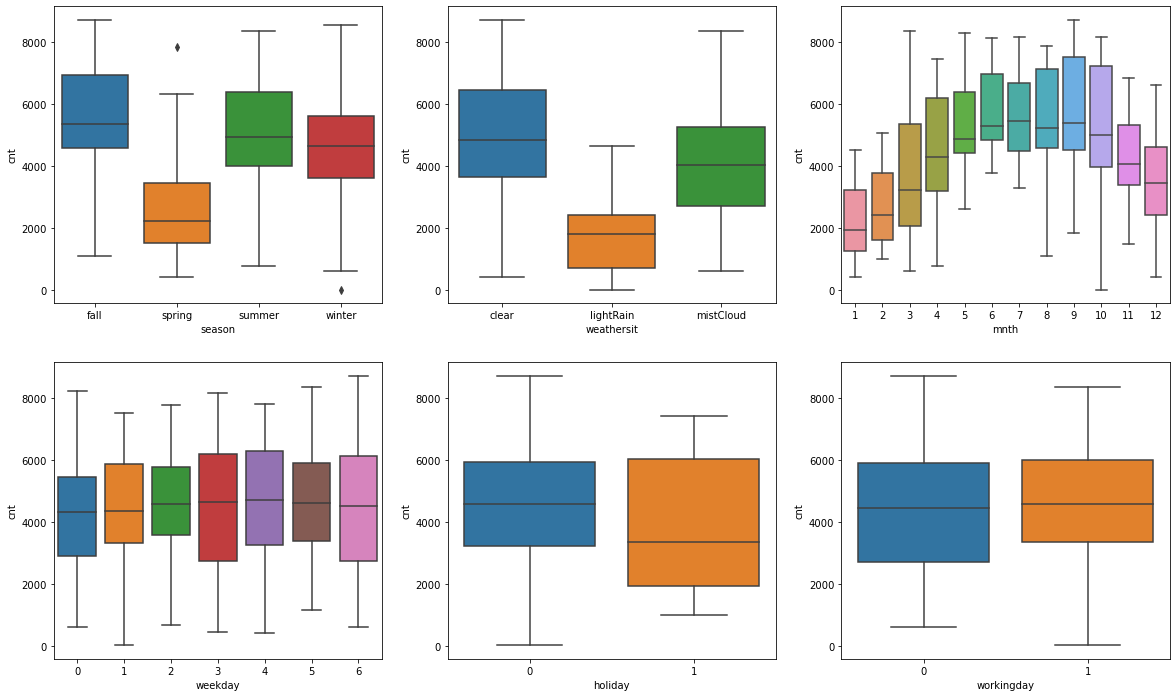

In [22]:
##visualising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_new)
plt.show()

In [23]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_share_new = pd.get_dummies(bike_share_new, drop_first=True)
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    uint8  
 9   season_summer         730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_2                730 non-null    uint8  
 12  mnth_3                730 non-null    uint8  
 13  mnth_4                730 non-null    uint8  
 14  mnth_5                730 non-null    uint8  
 15  mnth_6                7

In [25]:
bike_share_new.shape

(730, 30)

In [26]:
bike_share_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
### split the data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_share_new, train_size = 0.7, test_size = 0.3, random_state = 333)

In [56]:
df_train.shape

(510, 30)

In [57]:
df_test.shape

(219, 30)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
## rescaling the features using Min - Max

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


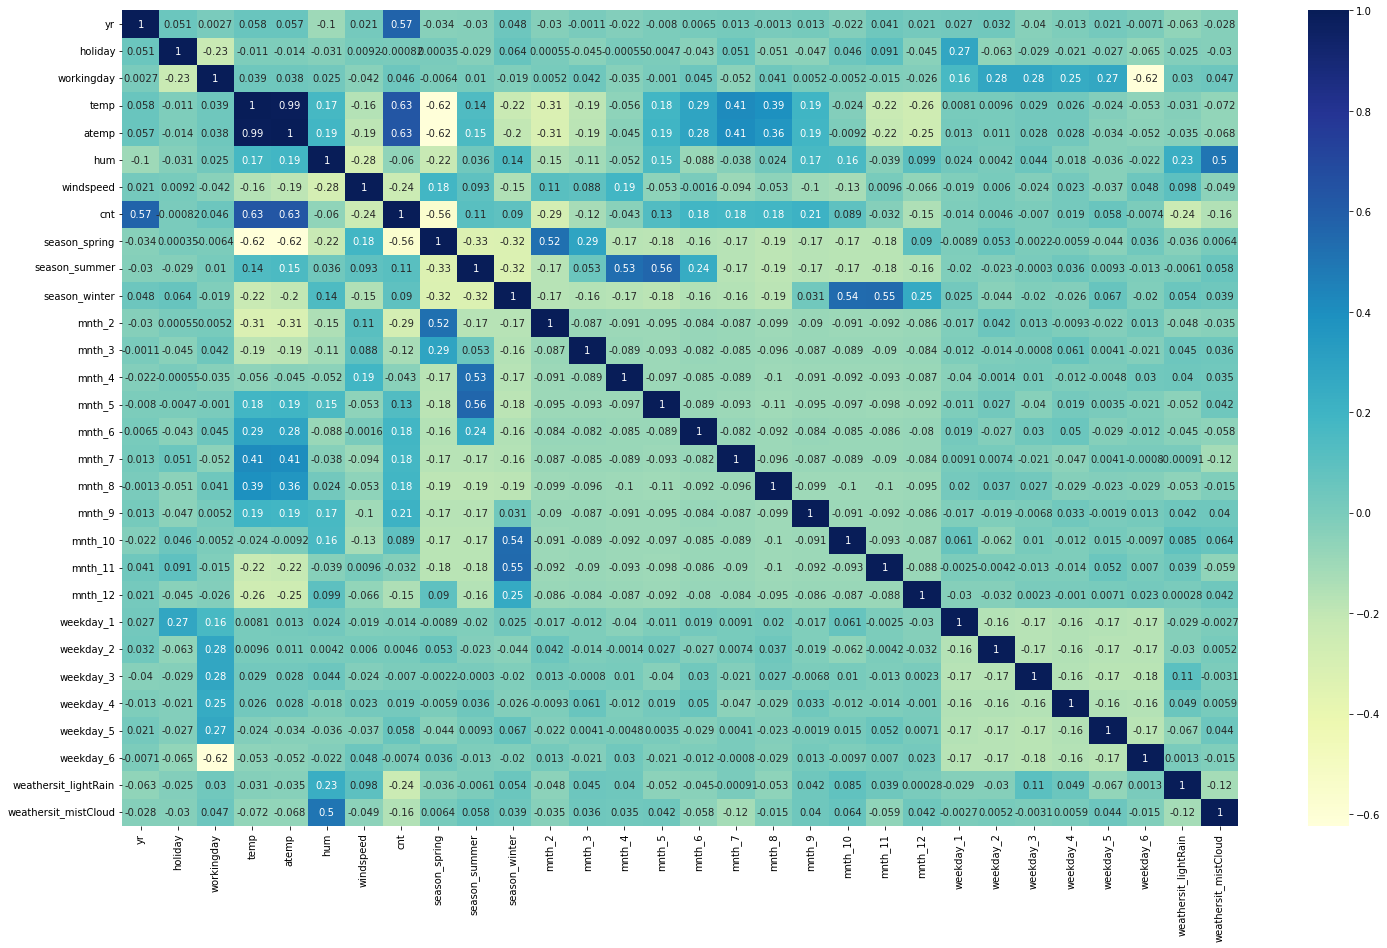

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [62]:
### Dividing into x and y set for model building
y_train = df_train.pop('cnt')
X_train = df_train


In [63]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 4),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_lightRain', True, 1),
 ('weathersit_mistCloud', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_9',
       'mnth_10', 'weekday_6', 'weathersit_lightRain', 'weathersit_mistCloud'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]


Index(['holiday', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [ ]:
## creating X_train dataframe with rfe columns
X_train_rfe = X_train[col]

In [70]:
##Building a linear model using stats model
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [71]:
# Check the parameters obtained

lr1.params

const                   0.325036
yr                      0.229064
workingday              0.041285
temp                    0.325528
atemp                   0.120080
hum                    -0.184270
windspeed              -0.172259
season_spring          -0.119929
season_winter           0.043576
mnth_3                  0.057258
mnth_5                  0.047588
mnth_9                  0.092506
mnth_10                 0.059264
weekday_6               0.054283
weathersit_lightRain   -0.269195
weathersit_mistCloud   -0.045603
dtype: float64

In [72]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.8
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          5.90e-186
Time:                        23:22:06   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     494   BIC:                            -915.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3250 

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,353.18
3,atemp,352.99
4,hum,23.69
5,windspeed,5.11
1,workingday,4.75
7,season_winter,2.92
6,season_spring,2.91
14,weathersit_mistCloud,2.25
0,yr,2.05
12,weekday_6,1.82


In [76]:
## removing variable atemp as its have high p-value and  high VIF

X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [77]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [78]:
# Check the parameters obtained

lr2.params

const                   0.327207
yr                      0.229057
workingday              0.041261
temp                    0.436551
hum                    -0.182761
windspeed              -0.176481
season_spring          -0.120035
season_winter           0.044444
mnth_3                  0.057927
mnth_5                  0.048396
mnth_9                  0.091994
mnth_10                 0.059598
weekday_6               0.054420
weathersit_lightRain   -0.270089
weathersit_mistCloud   -0.045883
dtype: float64

In [79]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          6.26e-187
Time:                        23:31:58   Log-Likelihood:                 507.27
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     495   BIC:                            -921.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3272 

In [80]:
#ViF check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.37
2,temp,13.72
4,windspeed,4.99
1,workingday,4.74
5,season_spring,2.90
6,season_winter,2.89
13,weathersit_mistCloud,2.25
0,yr,2.05
11,weekday_6,1.82
10,mnth_10,1.64


In [81]:
## M3 Removing hum as have hight VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [82]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [83]:
lr3.params

const                   0.223442
yr                      0.233530
workingday              0.042806
temp                    0.410550
windspeed              -0.139415
season_spring          -0.124484
season_winter           0.034843
mnth_3                  0.064059
mnth_5                  0.035479
mnth_9                  0.083540
mnth_10                 0.057595
weekday_6               0.055082
weathersit_lightRain   -0.324503
weathersit_mistCloud   -0.076190
dtype: float64

In [84]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.94e-183
Time:                        23:40:14   Log-Likelihood:                 495.48
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     496   BIC:                            -903.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2234 

In [85]:
#ViF check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.00
3,windspeed,4.97
1,workingday,4.56
5,season_winter,2.12
4,season_spring,2.09
0,yr,2.04
10,weekday_6,1.76
9,mnth_10,1.63
12,weathersit_mistCloud,1.54
7,mnth_5,1.23


In [86]:
## Model 4 removing season_winter as its have high p-value

X_train_new = X_train_new.drop(["season_winter"], axis = 1)

In [87]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [88]:
# Check the parameters obtained

lr4.params

const                   0.260437
yr                      0.235607
workingday              0.042102
temp                    0.370448
windspeed              -0.147022
season_spring          -0.145719
mnth_3                  0.060300
mnth_5                  0.027806
mnth_9                  0.086350
mnth_10                 0.078706
weekday_6               0.053357
weathersit_lightRain   -0.326074
weathersit_mistCloud   -0.076919
dtype: float64

In [90]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.56e-183
Time:                        23:51:00   Log-Likelihood:                 492.81
No. Observations:                 510   AIC:                            -959.6
Df Residuals:                     497   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2604 

In [91]:
#ViF check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.71
3,windspeed,4.75
1,workingday,4.31
0,yr,1.97
4,season_spring,1.89
9,weekday_6,1.72
11,weathersit_mistCloud,1.53
5,mnth_3,1.20
6,mnth_5,1.20
7,mnth_9,1.20


In [93]:
## Model 5 removing mnth_5 as its have high p-value
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)


In [94]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [95]:
lr5.params

const                   0.263269
yr                      0.235293
workingday              0.041759
temp                    0.374182
windspeed              -0.148726
season_spring          -0.148536
mnth_3                  0.058651
mnth_9                  0.081526
mnth_10                 0.074424
weekday_6               0.052909
weathersit_lightRain   -0.327160
weathersit_mistCloud   -0.075815
dtype: float64

In [97]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.30e-183
Time:                        23:56:15   Log-Likelihood:                 491.05
No. Observations:                 510   AIC:                            -958.1
Df Residuals:                     498   BIC:                            -907.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2633 

In [98]:
#ViF check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.50
3,windspeed,4.75
1,workingday,4.31
0,yr,1.97
4,season_spring,1.88
8,weekday_6,1.72
10,weathersit_mistCloud,1.52
5,mnth_3,1.20
6,mnth_9,1.17
7,mnth_10,1.14


In [ ]:
## this looks good model as minimum p-values 
## here not removing temp as temp looks one of significant feature in bike sharing

Text(0.5, 0, 'Errors')

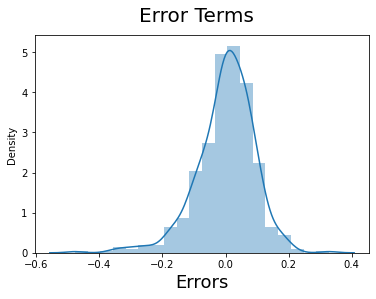

In [100]:
## Residual Analysis tests
##So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

y_train_pred = lr5.predict(X_train_lm5)
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [ ]:
##From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [107]:
## Making prediction using final Model
## Apply scaling to test set
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,0,1


In [108]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.036530,0.324201
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
##Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    219 non-null    int64  
 1   holiday               219 non-null    int64  
 2   workingday            219 non-null    int64  
 3   temp                  219 non-null    float64
 4   atemp                 219 non-null    float64
 5   hum                   219 non-null    float64
 6   windspeed             219 non-null    float64
 7   season_spring         219 non-null    uint8  
 8   season_summer         219 non-null    uint8  
 9   season_winter         219 non-null    uint8  
 10  mnth_2                219 non-null    uint8  
 11  mnth_3                219 non-null    uint8  
 12  mnth_4                219 non-null    uint8  
 13  mnth_5                219 non-null    uint8  
 14  mnth_6                219 non-null    uint8  
 15  mnth_7                

In [110]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 219 non-null    float64
 1   yr                    219 non-null    int64  
 2   workingday            219 non-null    int64  
 3   temp                  219 non-null    float64
 4   windspeed             219 non-null    float64
 5   season_spring         219 non-null    uint8  
 6   mnth_3                219 non-null    uint8  
 7   mnth_9                219 non-null    uint8  
 8   mnth_10               219 non-null    uint8  
 9   weekday_6             219 non-null    uint8  
 10  weathersit_lightRain  219 non-null    uint8  
 11  weathersit_mistCloud  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [111]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

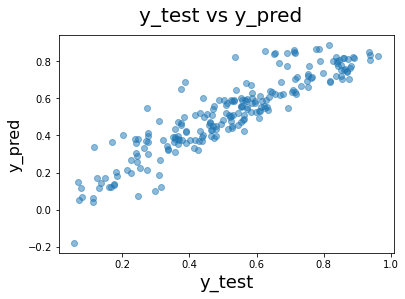

In [112]:
## Model evaluations
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [ ]:
## eauation for best fitted line
cnt=0.263269+(yr*0.235293)+(workingday*0.041759)+(temp*0.374182)-(windspeed*0.148726)-(season_spring*0.148536)+(0.058651*mnth_3)
(mnth_9*0.081526)+(mnth_10*0.074424)+(weekday_6*0.052909)-(weathersit_lightRain*0.327160)-(weathersit_mistCloud*0.075815)

In [113]:
# rsquare value test
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8267896869312239